In [ ]:
#Solving CSE Webmail captcha using OpenCV

The colour for captcha glyphs is #142864 <br>
The colour for captcha noise is #6478B4

In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev
! apt install Pillow
! apt install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (8,271 kB/s)
Selecting previously unselect

In [ ]:
!pip install Pillow
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import pytesseract

In [ ]:
img = cv.imread('/content/image.jpg',cv.IMREAD_GRAYSCALE)

# print(img.shape)

#resize image to enhance OCR
img = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)

#add gaussian blur to remove noise (some dots are coloured black in the raw version)
img = cv.GaussianBlur(img, (5, 5), 0)

#40 is sufficient to get basic text, but tesseract sometimes fails
#80 gets the next set of dots to make the text more filled out
thresh = 60
maxValue = 255

#apply thresholding
th, dst = cv.threshold(img, thresh, maxValue, cv.THRESH_BINARY);
# cv.imwrite('/content/captcha_bw.png',img)


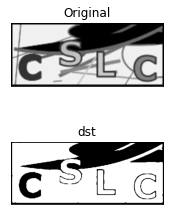

In [ ]:
#output
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(dst,cmap = 'gray')
plt.title('dst'), plt.xticks([]), plt.yticks([])
plt.show()

# cv.imwrite('/content/dst.png',dst)

In [ ]:
print(pytesseract.image_to_string(dst))

vhgr8

